In [1]:
import pickle
import pymc as pm
import arviz as az
import pandas as pd
import pandas as pd
import numpy as np
from scipy.special import expit
import math
import matplotlib.pyplot as plt


In [2]:
prefix = 'breeding_model_level_3_May15'

In [3]:
data = pickle.load(open(f'/data/{prefix}.pkl','rb'))

In [4]:
data.keys()

dict_keys(['idata', 'post_data', 'ess', 'rhat', 'bmfi', 'train_roc_auc', 'train_precision', 'train_recall', 'train_f1', 'test_roc_auc', 'test_precision', 'test_recall', 'test_f1', 'X_train_duration_minutes_std', 'X_train_duration_minutes_mean', 'X_train_cropland_std', 'X_train_cropland_mean', 'X_train_urban_areas_std', 'X_train_urban_areas_mean'])

In [5]:
data['bmfi']

array([0.99546607, 0.87921053])

In [6]:
data['rhat']

<xarray.Dataset>
Dimensions:                                     (sp_index: 28, year_index: 15,
                                                 order_index: 4, w_dim_0: 28,
                                                 w_dim_1: 15, w_dim_2: 2)
Coordinates:
  * sp_index                                    (sp_index) int64 0 1 2 ... 26 27
  * year_index                                  (year_index) int64 0 1 ... 13 14
  * order_index                                 (order_index) int64 0 1 2 3
  * w_dim_0                                     (w_dim_0) int64 0 1 2 ... 26 27
  * w_dim_1                                     (w_dim_1) int64 0 1 2 ... 13 14
  * w_dim_2                                     (w_dim_2) int64 0 1
Data variables: (12/24)
    beta                                        (sp_index, year_index) float64 ...
    urban_effect_on_detectability_overall       (sp_index, year_index) float64 ...
    cropland_effect_on_detectability_overall    (sp_index, year_index) float64 ...
    spring_arrival_dist_mu_overall              float64 1.004
    spring_arrival_dist_mu                      (sp_index, year_index) float64 ...
    spring_arrival_dist_sigma                   (sp_index, year_index) float64 ...
    ...                                          ...
    fall_departure_cropland_effect_overall      float64 1.001
    fall_departure_cropland_effect_order_level  (order_index) float64 1.001 ....
    fall_departure_cropland_effect              (sp_index) float64 1.002 ... ...
    duration_effect_slope                       (sp_index) float64 0.9992 ......
    w                                           (w_dim_0, w_dim_1, w_dim_2) float64 ...
    alpha                                       (sp_index, year_index) float64 ...

In [7]:
data['ess']

<xarray.Dataset>
Dimensions:                                     (sp_index: 28, year_index: 15,
                                                 order_index: 4, w_dim_0: 28,
                                                 w_dim_1: 15, w_dim_2: 2)
Coordinates:
  * sp_index                                    (sp_index) int64 0 1 2 ... 26 27
  * year_index                                  (year_index) int64 0 1 ... 13 14
  * order_index                                 (order_index) int64 0 1 2 3
  * w_dim_0                                     (w_dim_0) int64 0 1 2 ... 26 27
  * w_dim_1                                     (w_dim_1) int64 0 1 2 ... 13 14
  * w_dim_2                                     (w_dim_2) int64 0 1
Data variables: (12/24)
    beta                                        (sp_index, year_index) float64 ...
    urban_effect_on_detectability_overall       (sp_index, year_index) float64 ...
    cropland_effect_on_detectability_overall    (sp_index, year_index) float64 ...
    spring_arrival_dist_mu_overall              float64 1.359e+03
    spring_arrival_dist_mu                      (sp_index, year_index) float64 ...
    spring_arrival_dist_sigma                   (sp_index, year_index) float64 ...
    ...                                          ...
    fall_departure_cropland_effect_overall      float64 3.266e+03
    fall_departure_cropland_effect_order_level  (order_index) float64 4.142e+...
    fall_departure_cropland_effect              (sp_index) float64 2.841e+03 ...
    duration_effect_slope                       (sp_index) float64 1.945e+03 ...
    w                                           (w_dim_0, w_dim_1, w_dim_2) float64 ...
    alpha                                       (sp_index, year_index) float64 ...

In [8]:
data['idata'].posterior

<xarray.Dataset>
Dimensions:                                     (chain: 2, draw: 1000,
                                                 sp_index: 28, year_index: 15,
                                                 order_index: 4, w_dim_0: 28,
                                                 w_dim_1: 15, w_dim_2: 2)
Coordinates:
  * chain                                       (chain) int64 0 1
  * draw                                        (draw) int64 0 1 2 ... 998 999
  * sp_index                                    (sp_index) int64 0 1 2 ... 26 27
  * year_index                                  (year_index) int64 0 1 ... 13 14
  * order_index                                 (order_index) int64 0 1 2 3
  * w_dim_0                                     (w_dim_0) int64 0 1 2 ... 26 27
  * w_dim_1                                     (w_dim_1) int64 0 1 2 ... 13 14
  * w_dim_2                                     (w_dim_2) int64 0 1
Data variables: (12/24)
    beta                                        (chain, draw, sp_index, year_index) float64 ...
    urban_effect_on_detectability_overall       (chain, draw, sp_index, year_index) float64 ...
    cropland_effect_on_detectability_overall    (chain, draw, sp_index, year_index) float64 ...
    spring_arrival_dist_mu_overall              (chain, draw) float64 119.6 ....
    spring_arrival_dist_mu                      (chain, draw, sp_index, year_index) float64 ...
    spring_arrival_dist_sigma                   (chain, draw, sp_index, year_index) float64 ...
    ...                                          ...
    fall_departure_cropland_effect_overall      (chain, draw) float64 16.4 .....
    fall_departure_cropland_effect_order_level  (chain, draw, order_index) float64 ...
    fall_departure_cropland_effect              (chain, draw, sp_index) float64 ...
    duration_effect_slope                       (chain, draw, sp_index) float64 ...
    w                                           (chain, draw, w_dim_0, w_dim_1, w_dim_2) float64 ...
    alpha                                       (chain, draw, sp_index, year_index) float64 ...
Attributes:
    created_at:     2023-05-15T09:58:29.179816
    arviz_version:  0.15.1

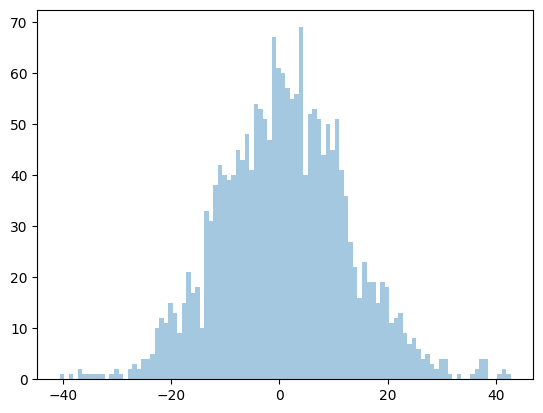

In [9]:
a = np.concatenate(data['idata'].posterior['spring_arrival_urban_effect_overall'].values, axis=0)

# for i in range(1):
#     plt.hist(a[:,i],alpha=0.4,bins=100)
plt.hist(a,alpha=0.4,bins=100)
plt.show()


In [10]:
a.shape

(2000,)

In [11]:
a = np.concatenate(data['idata'].posterior['beta'].values, axis=0)

In [12]:
a.shape

(2000, 28, 15)

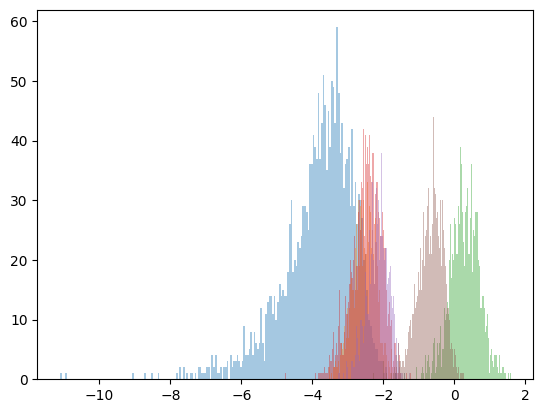

In [13]:
plt.hist(a[:,0,0].flatten(),bins=200,alpha=0.4)
plt.hist(a[:,0,1].flatten(),bins=200,alpha=0.4)
plt.hist(a[:,0,2].flatten(),bins=200,alpha=0.4)
plt.hist(a[:,0,3].flatten(),bins=200,alpha=0.4)
plt.hist(a[:,0,4].flatten(),bins=200,alpha=0.4)
plt.hist(a[:,0,5].flatten(),bins=200,alpha=0.4)
plt.show()

In [14]:
data['idata'].posterior['beta']

<xarray.DataArray 'beta' (chain: 2, draw: 1000, sp_index: 28, year_index: 15)>
array([[[[-4.39145182e+00, -2.83893062e+00, -1.31875275e-01, ...,
          -9.86433510e-01,  1.56486558e+00,  1.68003518e+00],
         [-1.68983815e+00, -3.70255506e-01,  2.38730837e+00, ...,
          -6.23083149e-01, -7.43280309e+00,  9.66168896e+00],
         [-7.43081275e-01, -3.05671182e+00, -6.96007651e-01, ...,
          -1.64689388e+00, -1.36282218e+00,  9.12746273e+00],
         ...,
         [-2.01168727e+00, -2.35939984e+00, -4.08092166e+00, ...,
          -3.74919199e+00,  9.77109771e+00,  3.09549574e+00],
         [-2.09170168e+00, -3.31287239e+00, -1.32570481e+00, ...,
          -1.49471172e+00, -6.91037114e+00,  5.89648783e-01],
         [-9.23151409e+00, -2.38829755e+00,  8.06329472e+00, ...,
          -2.96385093e+00, -1.80907611e+01, -9.70554186e+00]],

        [[-4.11937476e+00, -2.57471334e+00,  4.60909102e-01, ...,
          -2.31267040e+00,  1.14744358e+00,  8.42438989e-01],
         [-1.49648524e+00, -3.88016864e-01,  3.34507036e+00, ...,
           1.57054506e-02, -1.21085313e+01,  8.75517141e+00],
         [-1.42000589e+00, -3.19217465e+00,  1.93363990e-01, ...,
          -1.47316244e+00, -2.50615717e-01,  8.27396014e+00],
...
         [-2.74929885e+00, -5.39676692e+00,  1.75972002e+00, ...,
           8.68313253e-01,  3.80602999e+00,  1.02043972e+01],
         [-2.47068271e+00, -3.34125384e+00,  9.48140844e-02, ...,
          -3.01927831e+00,  3.89906177e+00,  2.29643268e+00],
         [-5.84310415e+00, -1.51638520e+00,  2.97614099e+00, ...,
          -2.20689796e+00, -2.23962539e+01, -6.72353248e+00]],

        [[-3.39746258e+00, -2.90908245e+00,  3.95293352e-02, ...,
          -1.58945398e+00,  6.86450759e-01, -7.14335980e-01],
         [-1.73993512e+00, -4.50327714e-01,  3.22932277e-01, ...,
          -8.97861181e-01, -2.21077312e+01,  5.70295214e+00],
         [-1.42254535e+00, -1.92165556e+00, -4.84351686e-01, ...,
          -2.28667938e+00,  2.80814207e-01,  1.23699144e+00],
         ...,
         [-2.45364114e+00, -4.06230612e+00,  3.80398455e+00, ...,
          -5.53679857e-01, -2.26479889e+00,  4.87491975e+00],
         [-1.73082191e+00, -3.15403070e+00, -6.46736447e-01, ...,
          -5.83497255e+00,  2.27372573e-01,  3.28538520e+00],
         [-3.00194876e+00, -1.65492365e+00, -2.85205821e-01, ...,
          -3.96621076e+00, -1.29224387e+01, -4.74726781e+00]]]])
Coordinates:
  * chain       (chain) int64 0 1
  * draw        (draw) int64 0 1 2 3 4 5 6 7 ... 992 993 994 995 996 997 998 999
  * sp_index    (sp_index) int64 0 1 2 3 4 5 6 7 8 ... 20 21 22 23 24 25 26 27
  * year_index  (year_index) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14

In [15]:
data['rhat']

<xarray.Dataset>
Dimensions:                                     (sp_index: 28, year_index: 15,
                                                 order_index: 4, w_dim_0: 28,
                                                 w_dim_1: 15, w_dim_2: 2)
Coordinates:
  * sp_index                                    (sp_index) int64 0 1 2 ... 26 27
  * year_index                                  (year_index) int64 0 1 ... 13 14
  * order_index                                 (order_index) int64 0 1 2 3
  * w_dim_0                                     (w_dim_0) int64 0 1 2 ... 26 27
  * w_dim_1                                     (w_dim_1) int64 0 1 2 ... 13 14
  * w_dim_2                                     (w_dim_2) int64 0 1
Data variables: (12/24)
    beta                                        (sp_index, year_index) float64 ...
    urban_effect_on_detectability_overall       (sp_index, year_index) float64 ...
    cropland_effect_on_detectability_overall    (sp_index, year_index) float64 ...
    spring_arrival_dist_mu_overall              float64 1.004
    spring_arrival_dist_mu                      (sp_index, year_index) float64 ...
    spring_arrival_dist_sigma                   (sp_index, year_index) float64 ...
    ...                                          ...
    fall_departure_cropland_effect_overall      float64 1.001
    fall_departure_cropland_effect_order_level  (order_index) float64 1.001 ....
    fall_departure_cropland_effect              (sp_index) float64 1.002 ... ...
    duration_effect_slope                       (sp_index) float64 0.9992 ......
    w                                           (w_dim_0, w_dim_1, w_dim_2) float64 ...
    alpha                                       (sp_index, year_index) float64 ...

In [16]:
data['bmfi']

array([0.99546607, 0.87921053])

In [17]:
data_ori = pd.read_csv(f'/data/{prefix}.csv')

<Axes: xlabel='DOY'>

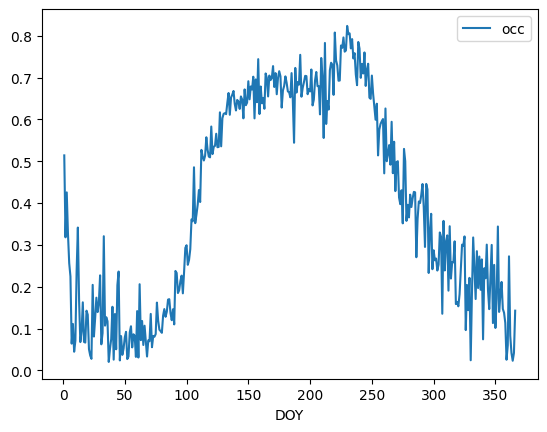

In [18]:
data_ori[['DOY','occ']].groupby('DOY').mean().plot()


In [19]:
data_ori[['urban_areas','cropland']].corr()

urban_areas  cropland
urban_areas     1.000000 -0.277959
cropland       -0.277959  1.000000

In [20]:
def math_cumulative_normal(x, mu, sigma, s=np.sqrt(2)):
    return 0.5 + 0.5 * math.erf((x-mu)/(sigma*s))
def math_neg_inverse_cumulative_normal(x, mu, sigma, s=np.sqrt(2)):
    return -0.5 - 0.5 * math.erf((x-mu)/(sigma*s))



In [21]:
idata = data['idata']
new_DOY_obs = data_ori['DOY'].values
new_sp_index_obs = data_ori['sp_index'].values
new_year_index_obs = data_ori['year_index'].values
new_urban_areas_obs = data_ori['urban_areas'].values
new_cropland_obs = data_ori['cropland'].values


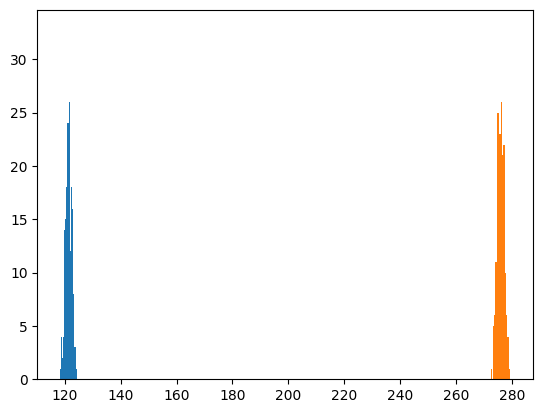

In [25]:
plt.hist(idata.posterior['spring_arrival_dist_mu_overall'].values.mean(axis=0),bins=100)

plt.hist(idata.posterior['fall_departure_dist_mu_overall'].values.mean(axis=0),bins=100)
plt.show()




In [26]:
idata = data['idata']

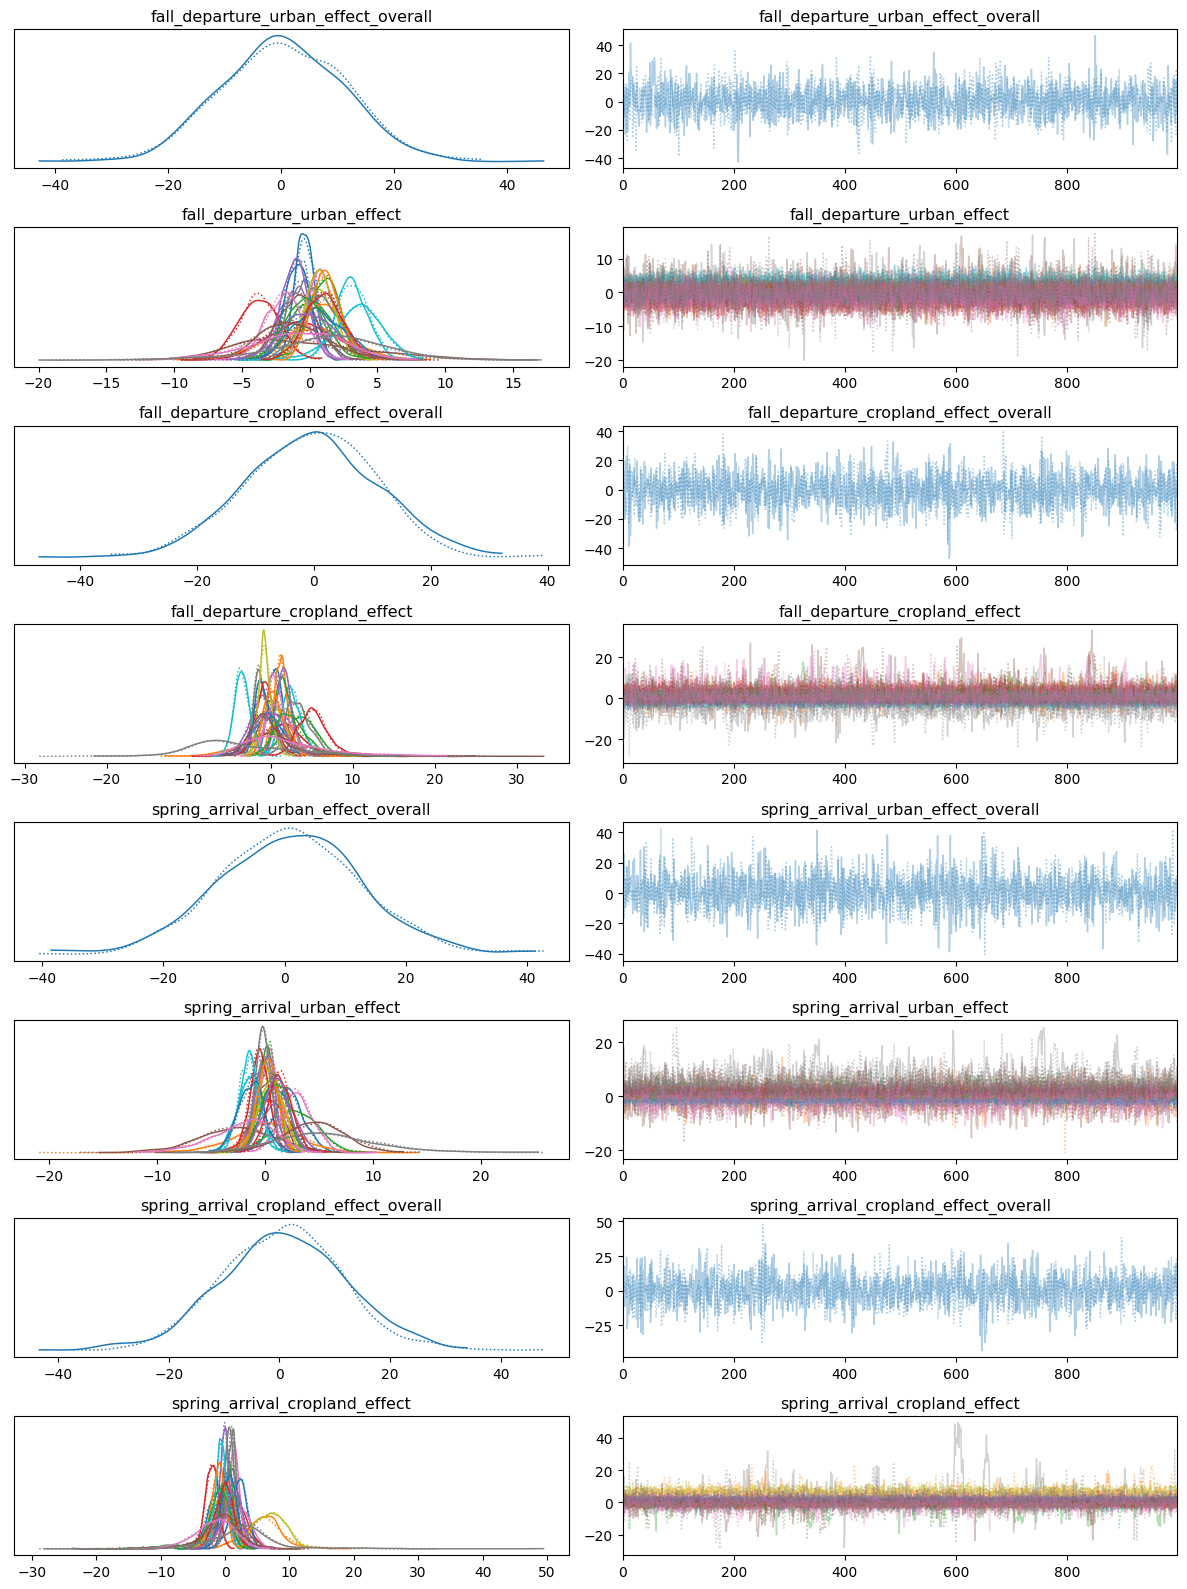

In [27]:
az.plot_trace(idata, var_names=['fall_departure_urban_effect_overall',
                                'fall_departure_urban_effect',
                               'fall_departure_cropland_effect_overall',
                                'fall_departure_cropland_effect',
                               'spring_arrival_urban_effect_overall',
                                'spring_arrival_urban_effect',
                               'spring_arrival_cropland_effect_overall',
                               'spring_arrival_cropland_effect'])

plt.tight_layout()
plt.show()


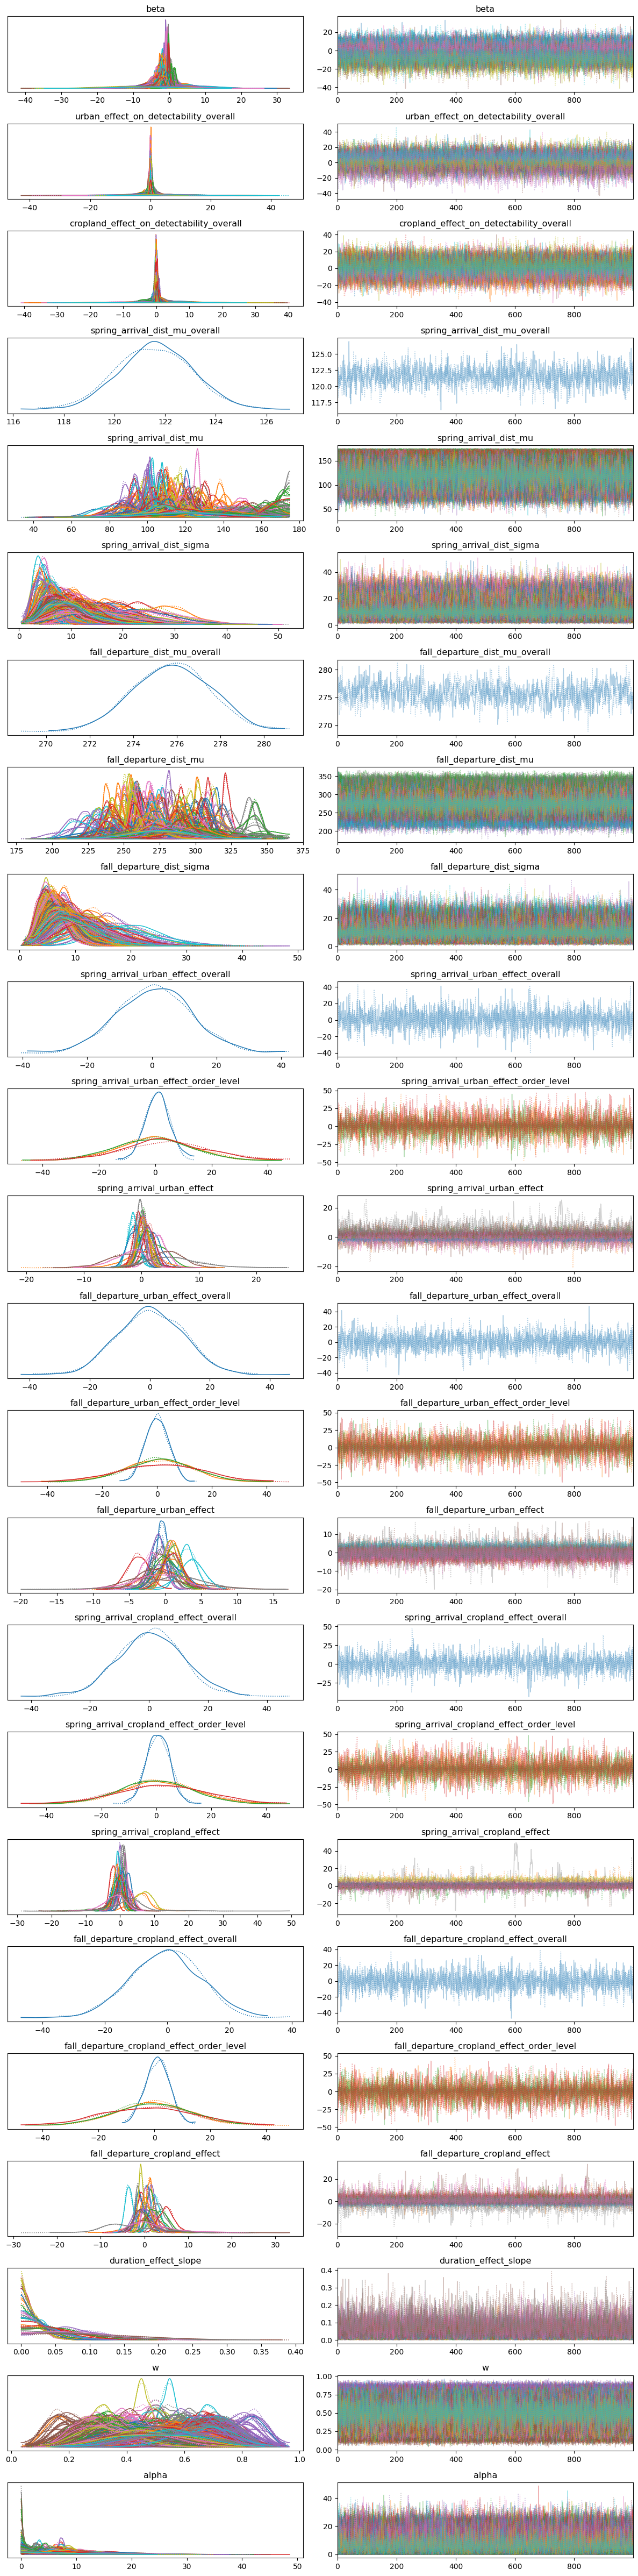

In [28]:
idata=data['idata']
az.rcParams["plot.max_subplots"] = 50
az.plot_trace(idata)
plt.tight_layout()
plt.show()



In [31]:
idata.posterior['fall_departure_dist_mu'].values.shape

(2, 1000, 28, 15)

In [57]:
fall_departure_day_lag_urban = np.concatenate(idata.posterior['fall_departure_urban_effect'].values, axis=0).mean(axis=0) / data['X_train_urban_areas_std']
fall_departure_day_lag_urban_std = np.concatenate(idata.posterior['fall_departure_urban_effect'].values, axis=0).std(axis=0) / data['X_train_urban_areas_std']

fall_departure_day_lag_cropland = np.concatenate(idata.posterior['fall_departure_cropland_effect'].values, axis=0).mean(axis=0) / data['X_train_cropland_std']
fall_departure_day_lag_cropland_std = np.concatenate(idata.posterior['fall_departure_cropland_effect'].values, axis=0).std(axis=0) / data['X_train_cropland_std']

corresponding_sp = data_ori[['sp','sp_index']].drop_duplicates().sort_values(by='sp_index').sp.values




In [59]:
pd.DataFrame({
    'sp':corresponding_sp,
    'fall_departure_day_lag_urban':fall_departure_day_lag_urban,
    'fall_departure_day_lag_urban_std':fall_departure_day_lag_urban_std,
    'fall_departure_day_lag_cropland':fall_departure_day_lag_cropland,
    'fall_departure_day_lag_cropland_std':fall_departure_day_lag_cropland_std
    
}).sort_values(by='fall_departure_day_lag_urban')


sp  fall_departure_day_lag_urban   
13      Great Crested Flycatcher                    -14.036972  \
16                 Swamp Sparrow                     -6.517950   
25                      Ovenbird                     -4.534747   
26  Black-throated Green Warbler                     -4.017893   
14                Warbling Vireo                     -3.801844   
4               Chipping Sparrow                     -3.352102   
10                  Gray Catbird                     -3.329955   
5               Northern Flicker                     -3.233532   
15                      Killdeer                     -2.514134   
3                 Common Grackle                     -1.884298   
7                 Yellow Warbler                     -1.675301   
0                   Song Sparrow                     -1.347467   
22        Rose-breasted Grosbeak                     -1.231329   
1                 American Robin                     -0.584662   
24        Chestnut-sided Warbler                     -0.169052   
2           Red-winged Blackbird                      0.531910   
20      Yellow-bellied Sapsucker                      2.620453   
11           Common Yellowthroat                      2.668069   
18              Baltimore Oriole                      2.779510   
17              Eastern Kingbird                      2.869171   
8                 Eastern Phoebe                      3.423039   
6                 Red-eyed Vireo                      3.552294   
12             American Redstart                      3.818081   
23                  Barn Swallow                      3.988659   
27     Black-crowned Night-Heron                      4.224532   
21       Black-and-white Warbler                      4.427427   
9                   Tree Swallow                     11.660467   
19             Spotted Sandpiper                     13.037432   

    fall_departure_day_lag_urban_std  fall_departure_day_lag_cropland   
13                          5.595270                        -4.136883  \
16                          5.219986                         7.058652   
25                          9.582609                         2.492032   
26                         12.553717                        13.064975   
14                          3.424111                        10.763446   
4                           5.019201                        -7.929952   
10                          3.528503                        -3.159140   
5                           5.526048                         1.460780   
15                         17.526045                        12.024680   
3                           9.380441                         6.728391   
7                           4.297698                        -6.122481   
0                           2.718058                         4.121772   
22                          5.738194                        17.525615   
1                          10.688259                         2.591297   
24                          7.443840                        -0.318738   
2                           5.911916                        22.342195   
20                          6.864015                        -1.687842   
11                          6.019913                         8.033558   
18                          3.852281                        -4.083708   
17                          5.348575                        22.110398   
8                           5.077125                         5.004647   
6                           4.104590                         4.165022   
12                          4.272273                        10.592348   
23                          5.170306                        33.038488   
27                         17.664814                       -21.756271   
21                          4.003617                         3.896225   
9                           4.542910                        16.058065   
19                          6.902885                       -21.979262  